# Analysis - IMDB Movies

### Importing Libraries and Loading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Movies = pd.read_csv(r"C:\Users\HP 830 TOUCH\Downloads\IMDB Dataset\Imdb Movie Dataset.csv")
Movies.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,...,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,7/15/2010,825532764,148,False,160000000,...,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,11/5/2014,701729206,169,False,165000000,...,en,Interstellar,The adventures of a group of explorers who mak...,140.241,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,7/16/2008,1004558444,152,False,185000000,...,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,12/15/2009,2923706026,162,False,237000000,...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,4/25/2012,1518815515,143,False,220000000,...,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [3]:
# Inspecting the data. 
Movies.shape

(1048575, 21)

In [4]:
Movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1048575 non-null  int64  
 1   title                 1048562 non-null  object 
 2   vote_average          1048575 non-null  float64
 3   vote_count            1048575 non-null  int64  
 4   status                1048575 non-null  object 
 5   release_date          866758 non-null   object 
 6   revenue               1048575 non-null  int64  
 7   runtime               1048575 non-null  int64  
 8   adult                 1048575 non-null  bool   
 9   budget                1048575 non-null  int64  
 10  imdb_id               560572 non-null   object 
 11  original_language     1048575 non-null  object 
 12  original_title        1048562 non-null  object 
 13  overview              832751 non-null   object 
 14  popularity            1048575 non-

The data appears to have several null entries.
We shall embark on __Data Cleaning__ before we proceed with our analysis

#### Data Cleaning

In [5]:
# Removing all rows with null values
movies = Movies.dropna()

print("Original Data Shape:", Movies.shape)
print("Cleaned Data Shape:", movies.shape)


Original Data Shape: (1048575, 21)
Cleaned Data Shape: (49701, 21)


In [6]:
print(movies.isnull().sum())


id                      0
title                   0
vote_average            0
vote_count              0
status                  0
release_date            0
revenue                 0
runtime                 0
adult                   0
budget                  0
imdb_id                 0
original_language       0
original_title          0
overview                0
popularity              0
tagline                 0
genres                  0
production_companies    0
production_countries    0
spoken_languages        0
keywords                0
dtype: int64


In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49701 entries, 0 to 1048477
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    49701 non-null  int64  
 1   title                 49701 non-null  object 
 2   vote_average          49701 non-null  float64
 3   vote_count            49701 non-null  int64  
 4   status                49701 non-null  object 
 5   release_date          49701 non-null  object 
 6   revenue               49701 non-null  int64  
 7   runtime               49701 non-null  int64  
 8   adult                 49701 non-null  bool   
 9   budget                49701 non-null  int64  
 10  imdb_id               49701 non-null  object 
 11  original_language     49701 non-null  object 
 12  original_title        49701 non-null  object 
 13  overview              49701 non-null  object 
 14  popularity            49701 non-null  float64
 15  tagline               

The dataset has significantly reduced in size. 
Sometimes we may not necessarily delete rows with null columns, but impute, based on the dataset.

In [8]:
# Remove columns that are not useful in our analysis.

movies = movies.drop(columns=['original_title', 'overview', 'tagline', 'spoken_languages', 'keywords'])

print("Updated Data Shape:", movies.shape)


Updated Data Shape: (49701, 16)


In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49701 entries, 0 to 1048477
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    49701 non-null  int64  
 1   title                 49701 non-null  object 
 2   vote_average          49701 non-null  float64
 3   vote_count            49701 non-null  int64  
 4   status                49701 non-null  object 
 5   release_date          49701 non-null  object 
 6   revenue               49701 non-null  int64  
 7   runtime               49701 non-null  int64  
 8   adult                 49701 non-null  bool   
 9   budget                49701 non-null  int64  
 10  imdb_id               49701 non-null  object 
 11  original_language     49701 non-null  object 
 12  popularity            49701 non-null  float64
 13  genres                49701 non-null  object 
 14  production_companies  49701 non-null  object 
 15  production_countries  

In [10]:
# Remove Movies with Zero or Unrealistic Values

# Remove rows where budget, revenue, or runtime is zero
movies = movies[(movies['runtime'] > 0) & (movies['revenue']>0)]

In [11]:
# Checking and removing duplicate entries

# Check for duplicates
print("Duplicate Rows:", movies.duplicated().sum())

# Remove duplicates if any
movies = movies.drop_duplicates()


Duplicate Rows: 0


In [12]:
# Convert the release date to a 'Date' datatype from an object

movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')

print(movies['release_date'].dtype)
print(movies['release_date'].head())


datetime64[ns]
0   2010-07-15
1   2014-11-05
2   2008-07-16
3   2009-12-15
4   2012-04-25
Name: release_date, dtype: datetime64[ns]


In [13]:
movies.shape

(9986, 16)

In [14]:
# Backup copy 
movies_backup = movies.copy()

In [15]:
# Standardize Status column

movies.loc[:, 'status'] = movies['status'].str.strip().str.lower()

In [16]:
# Extract Year from the release date for time-series analysis

movies.loc[:, 'release_year'] = movies['release_date'].dt.year.astype('Int64')

#### Analysis

In [17]:
# Descriptive Statistics

movies.describe()

,id,vote_average,vote_count,release_date,revenue,runtime,budget,popularity,release_year
count,9.986000e+03,9986.000000,9986.000000,9986,9.986000e+03,9986.000000,9.986000e+03,9986.000000,9986.0
mean,1.459159e+05,6.380339,1536.583617,2000-05-26 07:55:34.668535936,6.525811e+07,106.504206,2.189276e+07,20.641854,1999.868416
min,5.000000e+00,0.000000,0.000000,1914-11-15 00:00:00,1.000000e+00,1.000000,0.000000e+00,0.000000,1914.0
25%,1.049325e+04,5.883000,124.000000,1991-11-22 00:00:00,2.016750e+06,94.000000,1.250000e+01,8.896500,1991.0
50%,2.849950e+04,6.443000,453.000000,2005-09-07 12:00:00,1.320000e+07,103.000000,7.000000e+06,13.851500,2005.0
75%,2.204622e+05,7.009750,1518.750000,2014-03-14 18:00:00,5.667784e+07,117.000000,2.500000e+07,20.958000,2014.0
max,1.406474e+06,10.000000,34495.000000,2024-12-20 00:00:00,2.923706e+09,960.000000,4.600000e+08,2994.357000,2024.0
std,2.247405e+05,1.061046,2948.428327,NaN,1.546700e+08,23.945072,3.792435e+07,62.014479,19.047349


#### 1. Performance of movies


In [18]:
# What are the 10 highest-grossing movies - according to the revenue?

top_revenue = movies.sort_values(by='revenue', ascending=False)[['title', 'revenue']].head(10)
top_revenue_df = pd.DataFrame(top_revenue)
top_revenue_df


,title,revenue
3,Avatar,2923706026
15,Avengers: Endgame,2800000000
282,Avatar: The Way of Water,2320250281
17,Titanic,2264162353
56,Star Wars: The Force Awakens,2068223624
6,Avengers: Infinity War,2052415039
57,Spider-Man: No Way Home,1921847111
44,Jurassic World,1671537444
317,The Lion King,1663075401
4,The Avengers,1518815515


In [19]:
# What are the 10 lowest-grossing movies - according to the revenue?

bottom_revenue = movies.sort_values(by='revenue', ascending=True)[['title', 'revenue']].head(10)
bottom_revenue_df = pd.DataFrame(bottom_revenue)
bottom_revenue_df


,title,revenue
64693,The Lonely Lady,1
307764,"Head Full of Dreams, Heart Full of Promises",1
21893,MVP: Most Valuable Primate,1
58889,Extreme Days,1
259077,Lines of Glory,1
260471,The Interview,1
123204,The Bold and the Brave,1
242635,A Regular Thing,1
522361,Indestructible,1
489270,Dancing on the Grave,1


In [20]:
# What are the movies with the highest budget?

top_budget = movies.sort_values(by='budget', ascending=False)[['title', 'budget']].head(10)
top_budget_df = pd.DataFrame(top_budget)
top_budget_df


,title,budget
282,Avatar: The Way of Water,460000000
153,Pirates of the Caribbean: On Stranger Tides,379000000
23,Avengers: Age of Ultron,365000000
15,Avengers: Endgame,356000000
1110,Fast X,340000000
146,Pirates of the Caribbean: At World's End,300000000
178,Justice League,300000000
6,Avengers: Infinity War,300000000
1520,The Flash,300000000
2443,Indiana Jones and the Dial of Destiny,294700000


In [21]:
# What are the movies with the lowest budget?

bottom_budget = movies.sort_values(by='budget', ascending=True)[['title', 'budget']].head(10)
bottom_budget_df = pd.DataFrame(bottom_budget)
bottom_budget_df


,title,budget
50509,Dr. Cabbie,0
10341,Mulholland Falls,0
10347,Goat,0
10351,Misbehaviour,0
2813,The Ice Road,0
10269,Wake in Fright,0
10270,The Tower,0
10272,Malicious,0
10274,Revenge of the Nerds II: Nerds in Paradise,0
10275,Smiley Face,0


In [22]:
# What are the most popular movies
top_popular = movies.sort_values(by='popularity', ascending=False)[['title', 'popularity']].head(10)
top_popular_df = pd.DataFrame(top_popular)
top_popular_df


,title,popularity
3873,Blue Beetle,2994.357
5048,Gran Turismo,2680.593
7921,The Nun II,1692.778
2129,Meg 2: The Trench,1567.273
9954,Retribution,1547.220
4015,Talk to Me,1458.514
1110,Fast X,1175.267
6397,Sound of Freedom,1111.036
825,Barbie,1069.340
1799,Elemental,1008.942


           budget   revenue
budget   1.000000  0.749951
revenue  0.749951  1.000000


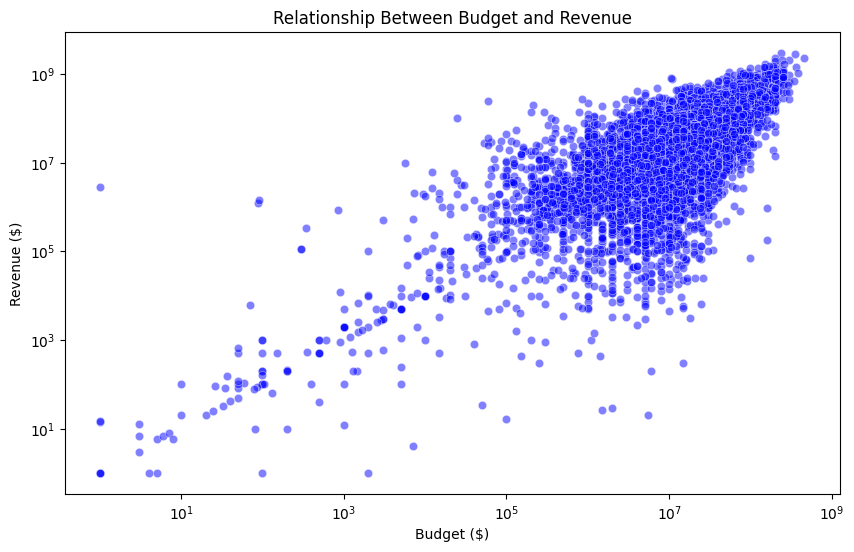

In [51]:
# How does movie budget affect the revenue?

correlation = movies[['budget', 'revenue']].corr()
print(correlation)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=movies['budget'], y=movies['revenue'], alpha=0.5, color='blue')
plt.xscale('log')  
plt.yscale('log')  
plt.xlabel('Budget ($)')
plt.ylabel('Revenue ($)')
plt.title('Relationship Between Budget and Revenue')
plt.show()



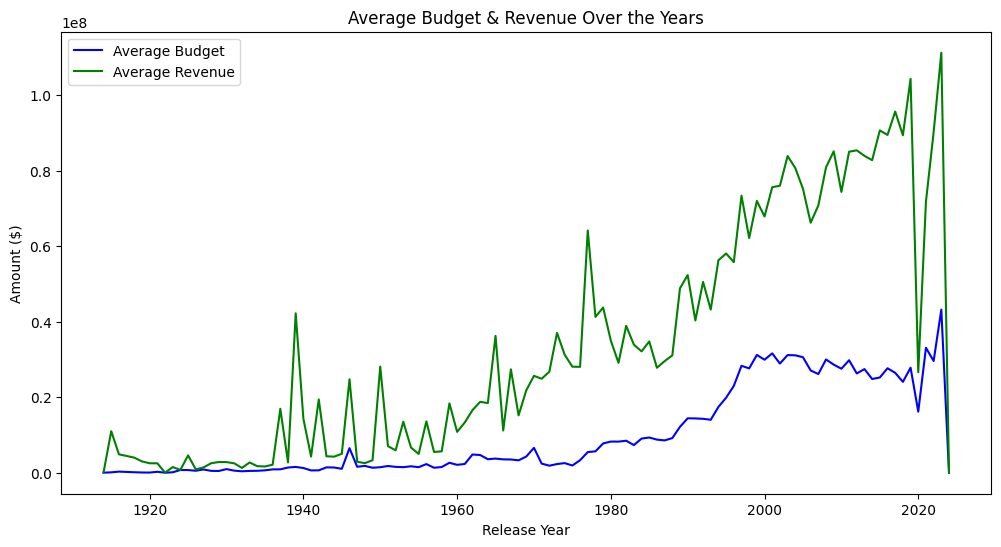

In [55]:
# What is the average budget vs revenue per year?

avg_budget_revenue_per_year = movies.groupby('release_year')[['budget', 'revenue']].mean().reset_index()
avg_budget_revenue_per_year.head()


plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_budget_revenue_per_year['release_year'], y=avg_budget_revenue_per_year['budget'], label='Average Budget', color='blue')
sns.lineplot(x=avg_budget_revenue_per_year['release_year'], y=avg_budget_revenue_per_year['revenue'], label='Average Revenue', color='green')

plt.xlabel('Release Year')
plt.ylabel('Amount ($)')
plt.title('Average Budget & Revenue Over the Years')
plt.legend()
plt.show()


#### Genre Analysis

In [23]:
# What are the most common movie genres?

from collections import Counter

# Split and count occurrences of each genre
genre_counts = Counter(genre for sublist in movies['genres'].dropna().str.split(', ') for genre in sublist)

# Convert to DataFrame for better readability
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

# Display the top genres
print(genre_df.head(10))


              Genre  Count
3             Drama   4653
7            Comedy   3429
5          Thriller   2505
0            Action   2329
8           Romance   1887
2         Adventure   1613
4             Crime   1512
14           Horror   1306
1   Science Fiction   1055
13           Family    977


In [29]:
# What is the average rating per genre?

highest_rated_genres_df = movies_exploded.groupby('genres')['vote_average'].mean().reset_index().sort_values(by='vote_average', ascending=False).head(10)
highest_rated_genres_df


,genres,vote_average
9,History,6.883649
17,War,6.754832
2,Animation,6.686979
11,Music,6.604592
5,Documentary,6.600055
6,Drama,6.564933
18,Western,6.463141
4,Crime,6.433825
8,Fantasy,6.432876
1,Adventure,6.424980


In [25]:
# What is the total revenue per genre?

total_revenue_per_genre = movies_exploded.groupby('genres')['revenue'].sum().sort_values(ascending=False)

print(total_revenue_per_genre.head(10))  


genres
Adventure          277566020900
Action             275945993024
Comedy             215000362786
Drama              190675394339
Thriller           148337815476
Science Fiction    138761744435
Fantasy            134223145873
Family             128442583943
Romance             89842149710
Animation           89081981344
Name: revenue, dtype: int64


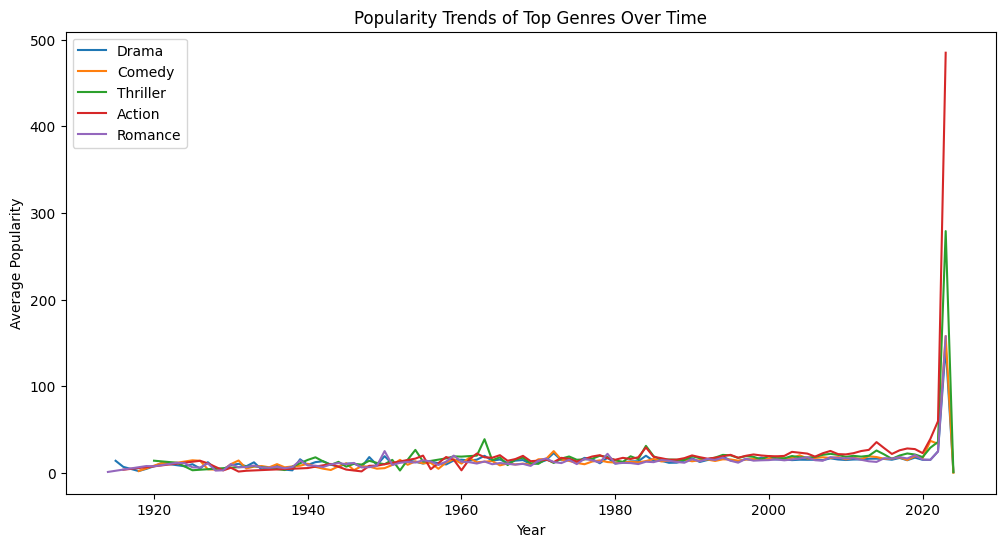

In [26]:
# How is the popularity of genres changed over-time?

genre_trend = movies_exploded.groupby(['release_year', 'genres'])['popularity'].mean().reset_index()

top_genres = genre_df.head(5)['Genre'].tolist()  
genre_trend = genre_trend[genre_trend['genres'].isin(top_genres)]


plt.figure(figsize=(12, 6))
for genre in top_genres:
    subset = genre_trend[genre_trend['genres'] == genre]
    plt.plot(subset['release_year'], subset['popularity'], label=genre)

plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.title('Popularity Trends of Top Genres Over Time')
plt.legend()
plt.show()


C:\Users\HP 830 TOUCH\AppData\Local\Temp\ipykernel_17812\681274804.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_roi_genres_df['genres'], x=top_roi_genres_df['ROI'], palette='crest')


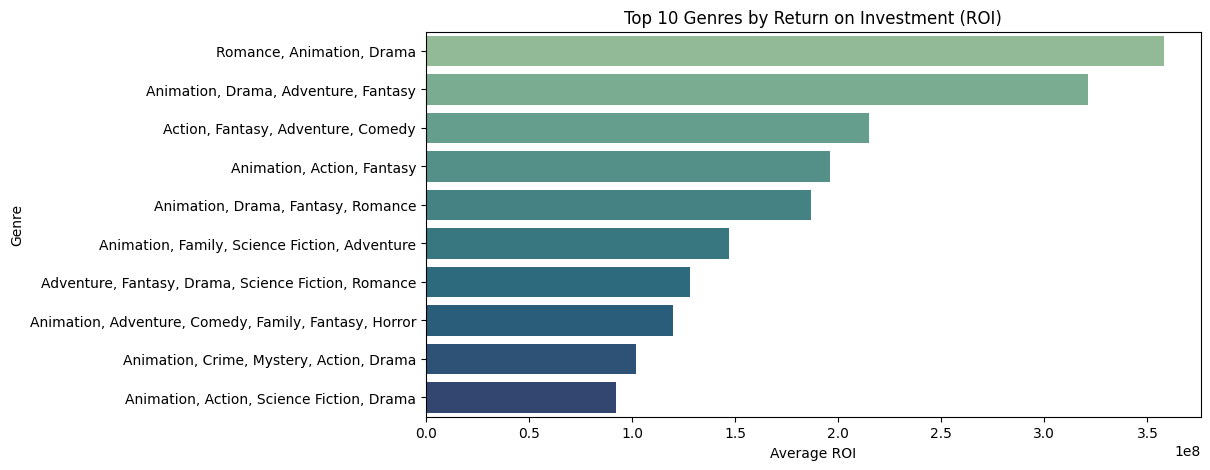

In [42]:
# What is the return on investment for each genre

movies_exploded['ROI'] = movies_exploded['revenue'] / movies_exploded['budget'].replace(0, 1)
roi_per_genre_df = movies_exploded.groupby('genres')['ROI'].mean().reset_index().sort_values(by='ROI', ascending=False)
roi_per_genre_df

# Plot
top_roi_genres_df = roi_per_genre_df.head(10)

plt.figure(figsize=(10,5))
sns.barplot(y=top_roi_genres_df['genres'], x=top_roi_genres_df['ROI'], palette='crest')
plt.xlabel('Average ROI')
plt.ylabel('Genre')
plt.title('Top 10 Genres by Return on Investment (ROI)')
plt.show()


#### Market trends and production

C:\Users\HP 830 TOUCH\AppData\Local\Temp\ipykernel_17812\3570230434.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_prod_companies_df['Production_Company'], x=top_prod_companies_df['Movie_Count'], palette='rocket')


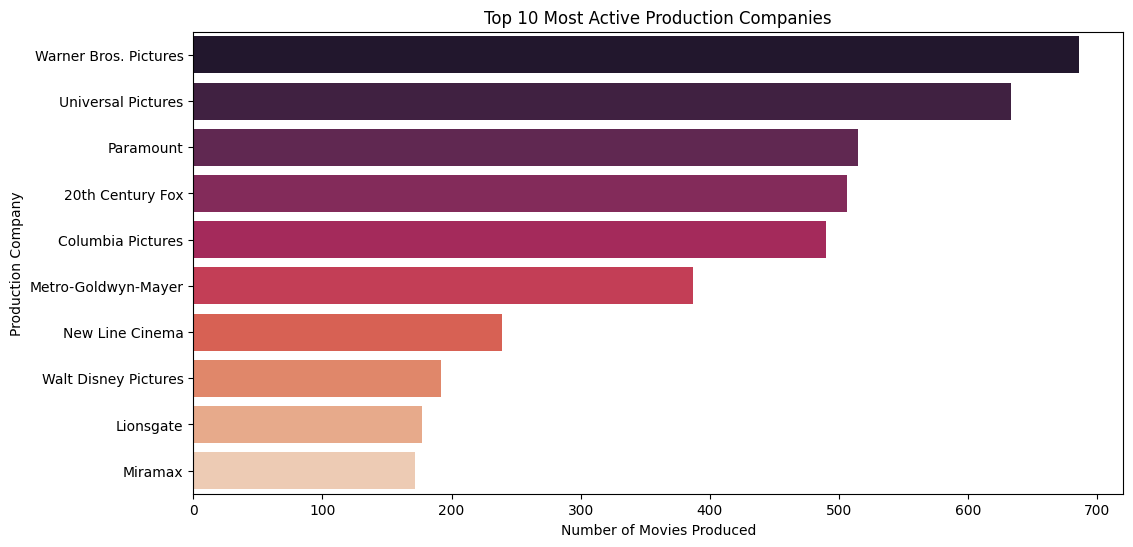

In [44]:
# What production companies have the most movies?

from collections import Counter

prod_counts = Counter(company for sublist in movies['production_companies'].dropna().str.split(', ') for company in sublist)

prod_count_df = pd.DataFrame(prod_counts.items(), columns=['Production_Company', 'Movie_Count']).sort_values(by='Movie_Count', ascending=False)
prod_count_df.head(10)  

# Plot
top_prod_companies_df = prod_count_df.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(y=top_prod_companies_df['Production_Company'], x=top_prod_companies_df['Movie_Count'], palette='rocket')
plt.xlabel('Number of Movies Produced')
plt.ylabel('Production Company')
plt.title('Top 10 Most Active Production Companies')
plt.show()


C:\Users\HP 830 TOUCH\AppData\Local\Temp\ipykernel_17812\885451248.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_revenue_companies_df['production_companies'], x=top_revenue_companies_df['revenue'], palette='flare')


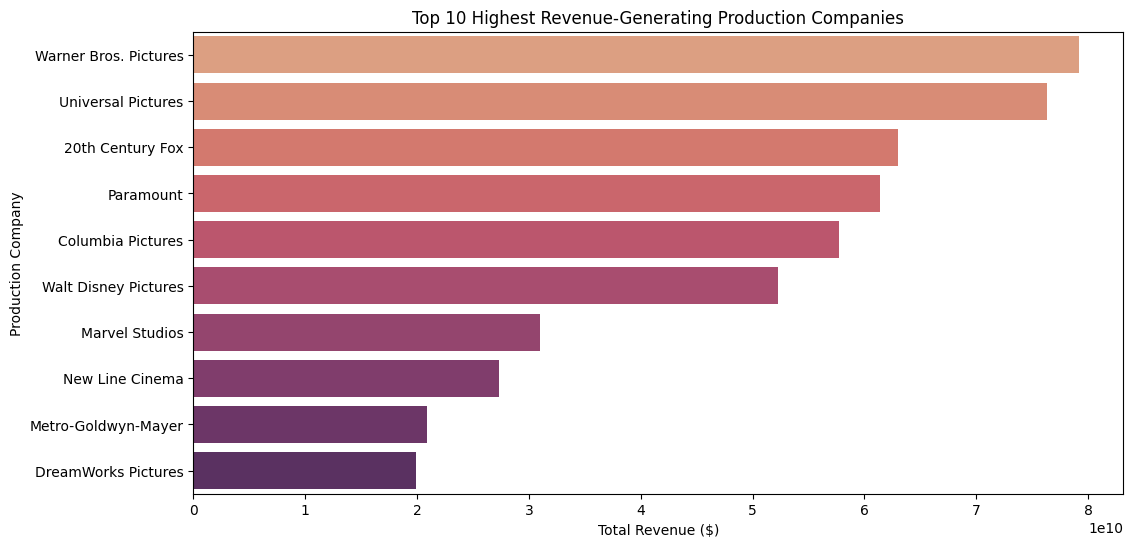

In [45]:
# Which production companies bring in the highest revenue?

movies_exploded = movies.assign(production_companies=movies['production_companies'].str.split(', ')).explode('production_companies')
top_revenue_companies_df = movies_exploded.groupby('production_companies')['revenue'].sum().reset_index().sort_values(by='revenue', ascending=False).head(10)
top_revenue_companies_df


plt.figure(figsize=(12, 6))
sns.barplot(y=top_revenue_companies_df['production_companies'], x=top_revenue_companies_df['revenue'], palette='flare')
plt.xlabel('Total Revenue ($)')
plt.ylabel('Production Company')
plt.title('Top 10 Highest Revenue-Generating Production Companies')
plt.show()



C:\Users\HP 830 TOUCH\AppData\Local\Temp\ipykernel_17812\3903412553.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_roi_companies_df['production_companies'], x=top_roi_companies_df['ROI'], palette='viridis')


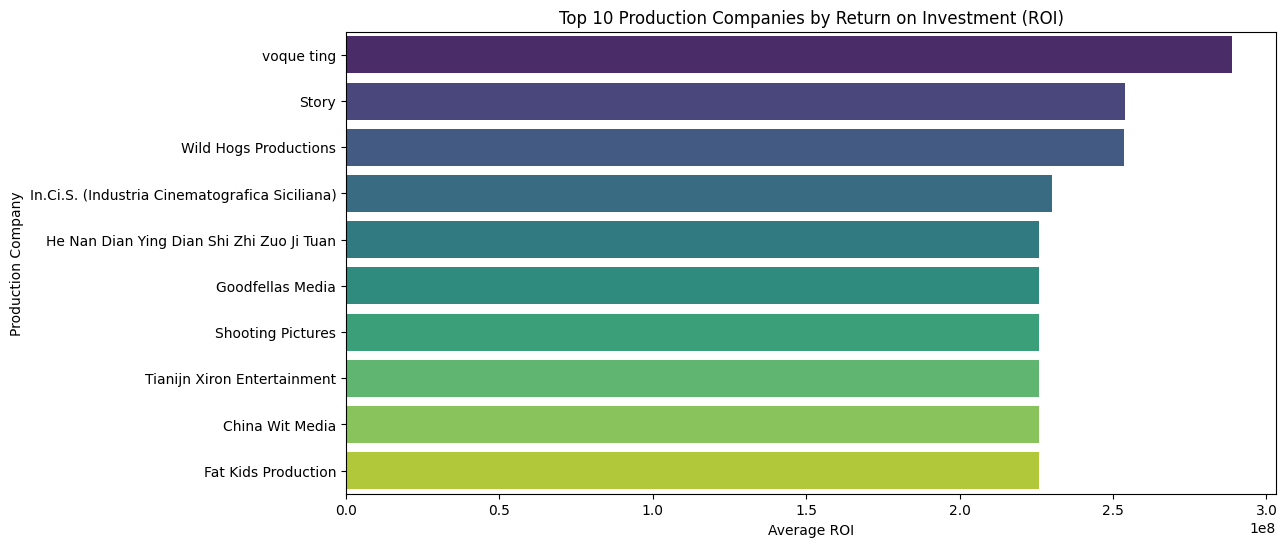

In [46]:
# What are the production companies with the highest ROI?

movies_exploded['ROI'] = movies_exploded['revenue'] / movies_exploded['budget'].replace(0, 1)  
roi_per_company_df = movies_exploded.groupby('production_companies')['ROI'].mean().reset_index().sort_values(by='ROI', ascending=False)
roi_per_company_df.head(10) 

top_roi_companies_df = roi_per_company_df.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_roi_companies_df['production_companies'], x=top_roi_companies_df['ROI'], palette='viridis')
plt.xlabel('Average ROI')
plt.ylabel('Production Company')
plt.title('Top 10 Production Companies by Return on Investment (ROI)')
plt.show()



C:\Users\HP 830 TOUCH\AppData\Local\Temp\ipykernel_17812\1498128296.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




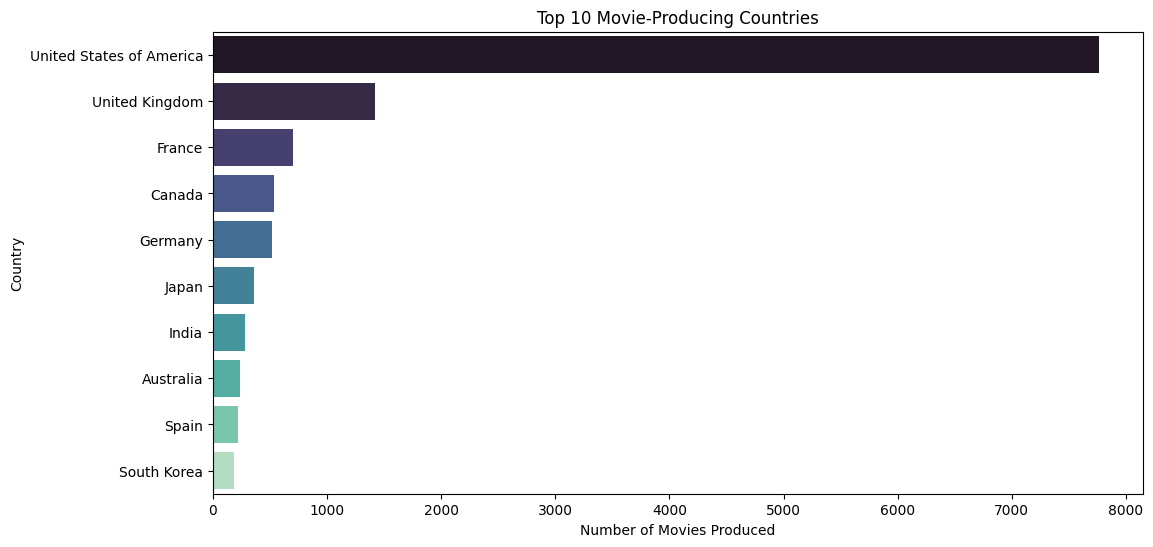

In [48]:
# Which countries produce the most movies?

country_counts = Counter(country for sublist in movies['production_countries'].dropna().str.split(', ') for country in sublist)
country_count_df = pd.DataFrame(country_counts.items(), columns=['Country', 'Movie_Count']).sort_values(by='Movie_Count', ascending=False)
country_count_df.head(10)  

top_movie_countries_df = country_count_df.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_movie_countries_df['Country'], x=top_movie_countries_df['Movie_Count'], palette='mako')
plt.xlabel('Number of Movies Produced')
plt.ylabel('Country')
plt.title('Top 10 Movie-Producing Countries')
plt.show()


In [34]:
# What countries generate the most revenue?

movies_exploded = movies.assign(production_countries=movies['production_countries'].str.split(', ')).explode('production_countries')
top_revenue_countries_df = movies_exploded.groupby('production_countries')['revenue'].sum().reset_index().sort_values(by='revenue', ascending=False).head(10)
top_revenue_countries_df


,production_countries,revenue
108,United States of America,611857433392
107,United Kingdom,93111654791
34,Germany,30519177885
17,Canada,28622628365
32,France,26073827034
49,Japan,19593220797
19,China,17325481151
5,Australia,11557411927
39,Hong Kong,9518163182
72,New Zealand,8804102384


#### Audience Analysis



In [35]:
# Average ratings per genre

highest_rated_genres_df = movies_exploded.groupby('genres')['vote_average'].mean().reset_index().sort_values(by='vote_average', ascending=False)
highest_rated_genres_df.head(10)  


,genres,vote_average
1370,"Family, Music, Romance",10.0
1023,"Documentary, Science Fiction, Fantasy, Mystery...",10.0
1021,"Documentary, Music, Drama, History",10.0
1571,"Horror, Mystery, Drama, Thriller",10.0
1010,"Documentary, Comedy, Romance, Adventure, Drama",10.0
789,"Comedy, Drama, Music, Science Fiction, Thriller",10.0
677,"Animation, History",10.0
1955,"Thriller, Mystery, Music, Horror, Drama, Crime...",10.0
379,"Adventure, Comedy, Drama, Family, Music, TV Movie",9.5
1567,"Horror, Mystery, Animation, Thriller",9.0


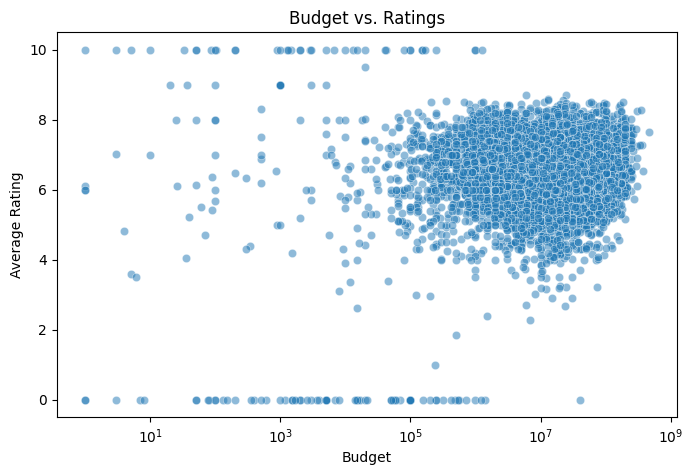

In [36]:
# Does the movie budget affect ratings?

plt.figure(figsize=(8, 5))
sns.scatterplot(x=movies['budget'], y=movies['vote_average'], alpha=0.5)
plt.xscale('log')  
plt.xlabel('Budget')
plt.ylabel('Average Rating')
plt.title('Budget vs. Ratings')
plt.show()


In [37]:
# How do production companies influence the ratings?

highest_rated_companies_df = movies_exploded.groupby('production_companies')['vote_average'].mean().reset_index().sort_values(by='vote_average', ascending=False).head(10)
highest_rated_companies_df


,production_companies,vote_average
8303,Çağlar Odabaş,10.0
390,Anchored Lens Productions,10.0
7969,Warren Tech,10.0
8266,"distopia, circulo blanco",10.0
8265,digital eye art production,10.0
981,Bright Ideas Pictures,10.0
1112,CalArts,10.0
7585,VVERKH!,10.0
1319,"Child of Nature Films, Enigma Filmes, Interest...",10.0
1350,Cine-FilmsLanka,10.0


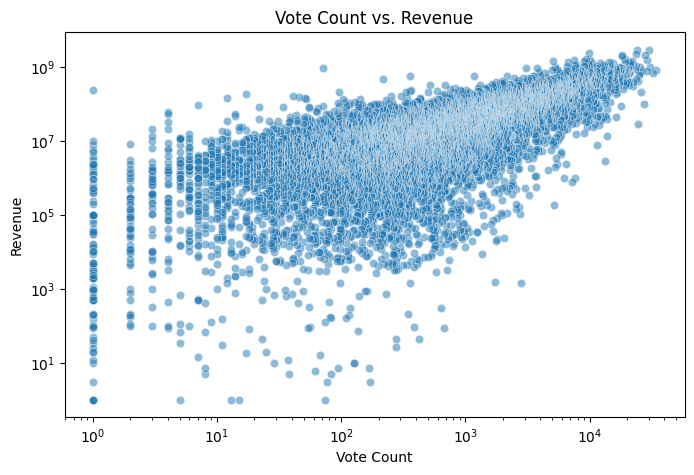

In [38]:
# Does higher vote count mean more revenue?

plt.figure(figsize=(8, 5))
sns.scatterplot(x=movies['vote_count'], y=movies['revenue'], alpha=0.5)
plt.xscale('log')  
plt.yscale('log')
plt.xlabel('Vote Count')
plt.ylabel('Revenue')
plt.title('Vote Count vs. Revenue')
plt.show()


Correlation between Ratings and Revenue: 0.18


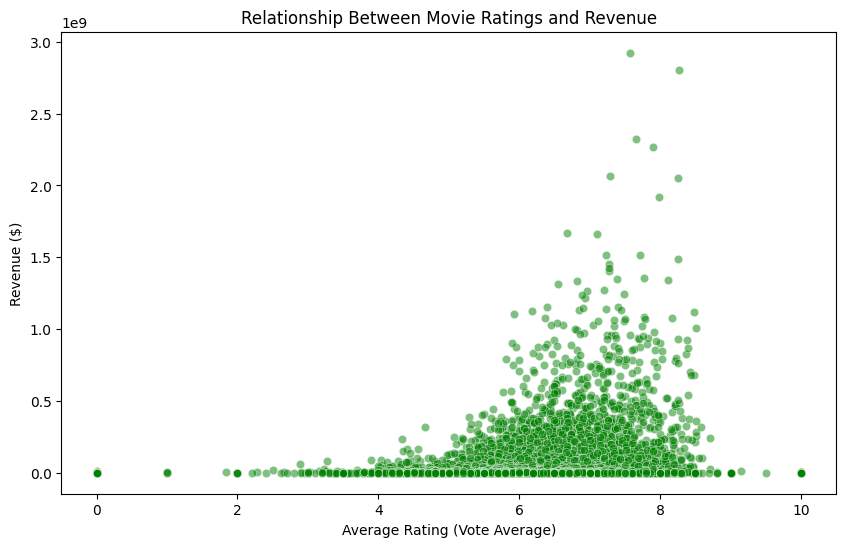

In [53]:
# How does ratings affect revenue?

correlation = movies[['vote_average', 'revenue']].corr().iloc[0,1]
print(f"Correlation between Ratings and Revenue: {correlation:.2f}")


plt.figure(figsize=(10, 6))
sns.scatterplot(x=movies['vote_average'], y=movies['revenue'], alpha=0.5, color='green')
plt.xlabel('Average Rating (Vote Average)')
plt.ylabel('Revenue ($)')
plt.title('Relationship Between Movie Ratings and Revenue')
plt.show()


Correlation between Runtime and Ratings: 0.30
Correlation between Runtime and Revenue: 0.21


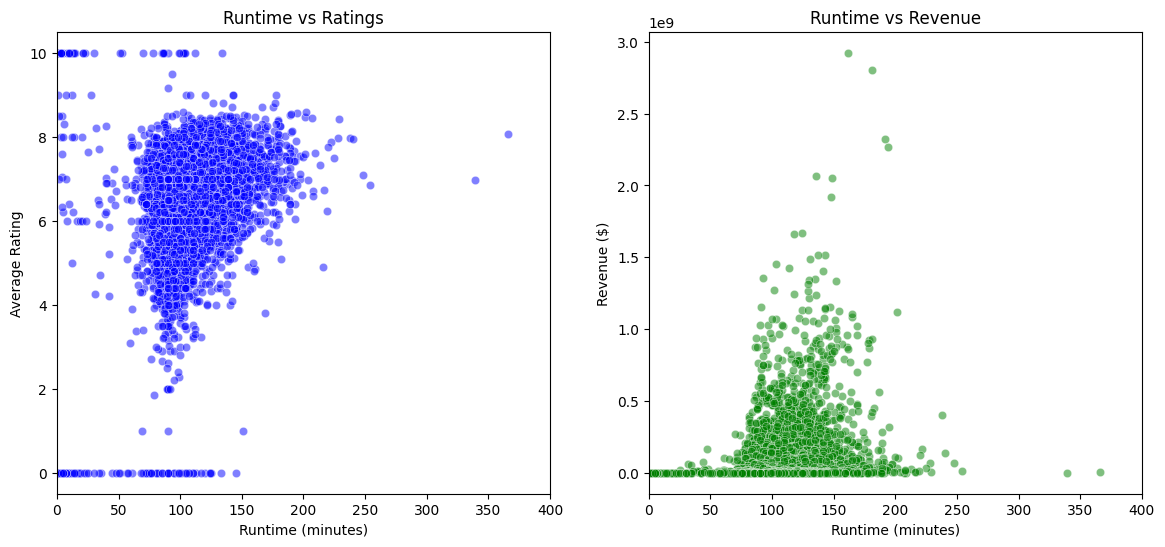

In [58]:
# How does run-time affect ratings and revenue?

corr_runtime_rating = movies[['runtime', 'vote_average']].corr().iloc[0,1]
corr_runtime_revenue = movies[['runtime', 'revenue']].corr().iloc[0,1]

print(f"Correlation between Runtime and Ratings: {corr_runtime_rating:.2f}")
print(f"Correlation between Runtime and Revenue: {corr_runtime_revenue:.2f}")



fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Runtime vs Ratings
sns.scatterplot(x=movies['runtime'], y=movies['vote_average'], alpha=0.5, ax=axes[0], color='blue')
axes[0].set_xlabel('Runtime (minutes)')
axes[0].set_ylabel('Average Rating')
axes[0].set_title('Runtime vs Ratings')
axes[0].set_xlim(0, 400)  # Limit runtime to 400

# Runtime vs Revenue
sns.scatterplot(x=movies['runtime'], y=movies['revenue'], alpha=0.5, ax=axes[1], color='green')
axes[1].set_xlabel('Runtime (minutes)')
axes[1].set_ylabel('Revenue ($)')
axes[1].set_title('Runtime vs Revenue')
axes[1].set_xlim(0, 400)  # Limit runtime to 400

plt.show()



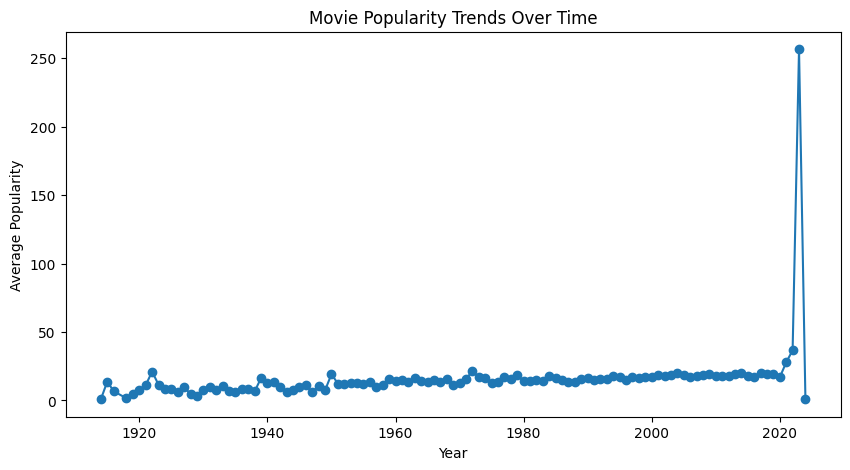

In [39]:
# What is the movie popularity over time?

popularity_trend_df = movies.groupby('release_year')['popularity'].mean().reset_index()

plt.figure(figsize=(10,5))
plt.plot(popularity_trend_df['release_year'], popularity_trend_df['popularity'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.title('Movie Popularity Trends Over Time')
plt.show()


#### Insights

__Business Questions__
* Which genres generate the most revenue?
* What is the relationship between budget and revenue?
* Do higher-rated movies generate more revenue?
* Which production companies produce the most successful movies?
* What is the average budget and revenue for movies over the years?
* Which countries produce the highest-grossing movies?
* Do longer movies perform better in terms of ratings and revenue?




#### Conclusion

1. The genre that generates the most revenue is __Adventure__, whereas the most common genre is __Drama__.
2. There is a strong positive correlation between __Budget__ and __Revenue__ indicating that __the higher the movie budget, the higher the revenue__.
3. There is __little to no relationship__ between the __movie ratings__ and the __revenue__.
4. __Warner Bros. Pictures__ is the production company with the __highest grossing movies, and the most movies produced__. However, the company with the __highest ROI__ is __Voque ting.__
5. There is steady increase in the movie budget per year, with a corresponding increase in revenue.
6. __The United States of America__ and __The United Kingdom__ are the countries that produced the __highest-revenue movies__, with the United states producing a significanttly higher number of movies compared to the other countries.
7. There is no relationship between movie runtime and revenue or ratings.